# Assignment 7: Linear Classifiers and Model Validation

### <b>NetID</b>: acv49

##### This week we're introducing linear classifiers, namely the **Perceptron**, and then delving deeper into **Model Validation**.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Perceptron

Perceptron was developed by American psychologist Frank Rosenblatt in 1957 at the **Cornell** Aeronautical Laboratory. Shout-out to one of our greatest alumni!

Perceptron is a linear binary classifier. So the underlying assumption about the dataset is that there are two labels - i.e. binary labels (conventionally, +1 and -1), and that the two classes should be classified with a linear hyperplane (Although, keep in mind that the [Multi-Layer Perceptron (MLP)](https://en.wikipedia.org/wiki/Multilayer_perceptron) is applicable to non-linearly separable data. We won't cover MLP in this course as it is part of Artificial Neural Networks (ANN), which is not in our scope).



The Perceptron "learns" a series of weights, each of which corresponds to each input feature, i.e. X of our data. For example, we are given a dataset of dog and cat. The input feature set consists of three columns: weight $x_1$, height $x_2$, and length $x_3$ of each animal. Then Perceptron will keep track of three different weights: $w_1$, $w_2$, and $w_3$. Each pair of input features and weights is multiplied and summed up: $s = w_1*x_1 + w_2*x_2 + w_3*x_3$. If the summed-up result $s$ is greater than a certain threshold, then we predict one class, and if it is less than the threshold, then we predict the other. For example, if our threshold is 0, then we can set it as: if $s > 0$, then the given input feature is a description of (+1) label (i.e. a dog), and if $s < 0$, then it is (-1) label (i.e. a cat). Then Perceptron will check if the predictions made were correct. If some of them were not, then the weights are updated accordingly. This process continues for a certain number of "epochs," or iterations. The end goal is to classify every point correctly by finding a *perfect* linear hyperplane.

The final step is to check if our predictions were classified correctly. If they were not, then the weights are updated using a learning rate. This process continues for a certain number of iterations, known as “epochs.” The goal is to determine the weights that produce a linear decision boundary that correctly classifies the predictions.

<img src="https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png" alt="perceptron.png" style="width: 50%;"/>

# Problem 1: Perceptron Learning (4 points)



Let's create a perceptron to predict whether someone has breast cancer. This is no different from what you've done with models before, but we're going to write our code inside a function so we can reuse it later.

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

"""
test_size: a float between 0 and 1 indicating the size of the train set
"""
def classifier_accuracy(classifier, features, goal, n_training_points, n_testing_points=None):

    if n_training_points > len(goal):
        raise ValueError("bad input to classifier_accuracy: number of training points requested is greater than length of dataset")
    if n_training_points <= 0:
        raise ValueError("bad input to classifier_accuracy: number of training points requested must be greater than 0")

    if n_testing_points is None:
        n_testing_points = len(goal) - n_training_points

    if n_testing_points > len(goal):
        raise ValueError("bad input to classifier_accuracy: number of testing points requested is greater than length of dataset")
    if n_testing_points < 0:
        raise ValueError("bad input to classifier_accuracy: number of testing points requested must be greater than 0")

    if n_training_points + n_testing_points > len(goal):
        raise ValueError("bad input to classifier_accuracy: number of training + testing points requested is greater than length of dataset")

    n_total_points = n_training_points + n_testing_points

    if n_training_points + n_testing_points < len(goal):
        indices = np.random.choice(len(features), n_total_points)
        features = features[indices,:]
        goal = goal[indices]

    test_size = n_testing_points / n_total_points

    ###############################################################################
    ##### Don't touch anything in this cell above this line! Only add code below.
    ###############################################################################

    train_x, test_x, train_y, test_y = train_test_split(features, goal, test_size = test_size) 

    classifier.fit(train_x, train_y)

    #FILL HERE: Compute your model's train and test accuracy using accuracy_score
    train_accuracy = accuracy_score(train_y, classifier.predict(train_x))
    test_accuracy = accuracy_score(test_y, classifier.predict(test_x))

    return train_accuracy, test_accuracy


X, y = load_breast_cancer(return_X_y=True)

# we train on 400 of the ~500 data points, equivalent to 20% test set
train, test = classifier_accuracy(Perceptron(), X, y, 400)
print("train accuracy:\t", train)
print("test accuracy:\t", test)


train accuracy:	 0.745
test accuracy:	 0.7751479289940828


# Problem 2: Data Limitations of Cross Validation Pt. 1 - Train Size (1 point)

Cross validation is an extraordinarily powerful technique and is used in almost every supervised learning problem. But, it does have its limitations -- some problems are inherent to supervised learning, and cross validation can't fix those issues.

One such limitation has to do with the size of the train set (i.e. how many points we pass into `model.fit`). Let's explore this limitation.

The code block below may include Python constructs that you're not familiar with. That's okay -- **we don't expect you to be able to understand all the code**, and that's not the point of this example. Just **set n_training_points** by replacing "FILL IN HERE", and **analyze the average accuracy** outputted. If you get an error, read the error message and change your number accordingly.

**Make sure to try both small (single digits) and big (triple digits) values of n_training_points!**

In [30]:
X, y = load_breast_cancer(return_X_y=True)

# TODO try setting n_training_points to a few different numbers. If you get an error, read the error message and change your number accordingly.
n_training_points = 400

n_testing_points = 100
accs = []
for i in range(1000):
    for _ in range(50):
        try:
            train_acc, test_acc = classifier_accuracy(Perceptron(), X, y, n_training_points, n_testing_points)
            accs.append(test_acc)
            break
        except ValueError as e:
            if "bad input to classifier_accuracy:" in str(e):
                raise e
            continue

print("avg. accuracy:", round(np.mean(accs),4))


avg. accuracy: 0.8459


## Analysis

##### What is the relationship between # of training points and average accuracy?

The more training points you have, the higher average accuracy would be. 

# Problem 3: Kernel (K)lassification (2 points)

Another powerful machine learning model discussed in lecture is the <b>Support Vector Machine</b>, or SVM. These can be used for classification of linear and non-linear data, depending on which kernel function they use. We won't be getting into the math of kernel functions, but if you are interested, [here](https://cs.cornell.edu/courses/cs4780/2024sp/lectures/lecturenote13.html) are Prof. Killian Weinberger's lecture notes on the topic from CS 3780.

Let's explore how different kernels are suited to different shaped data!

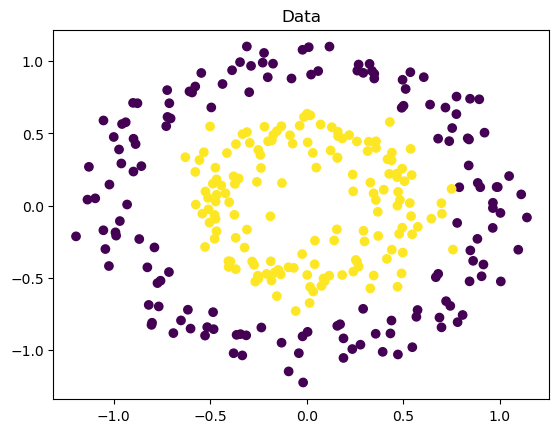

In [31]:
# Visualize the dataset
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# extract built-in dataset from sklearn
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# creating train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)

# visualize the raw data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Data')
plt.show()

In [32]:
# DO NOT EDIT: helper function for seeing decision boundary of model given data X, y
def plot_decision_boundary(model, X, y, kernel_type):
  # Set the limits of the plot
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  # Create a grid of points
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Predict the classification for each grid point
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # clear plot
  plt.clf()

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')

  # Overlay the actual data points
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

  # Add titles and labels
  plt.title(f"Decision Boundary for {kernel_type} Kernel")
  plt.show()

Linear SVM Classification Accuracy 0.4166666666666667


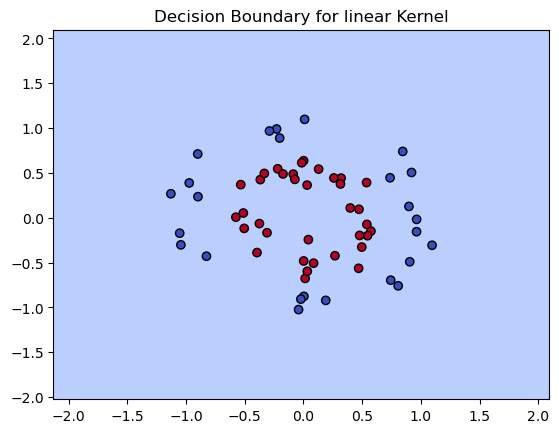

In [37]:
# use a Linear Kernel
svm1 = SVC(kernel='linear')
svm1.fit(X_train, y_train)
linear_pred = svm1.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_pred)

print(f"Linear SVM Classification Accuracy {linear_accuracy}")
plot_decision_boundary(svm1, X_test, y_test, "linear")

RBF SVM Classification Accuracy 0.9833333333333333


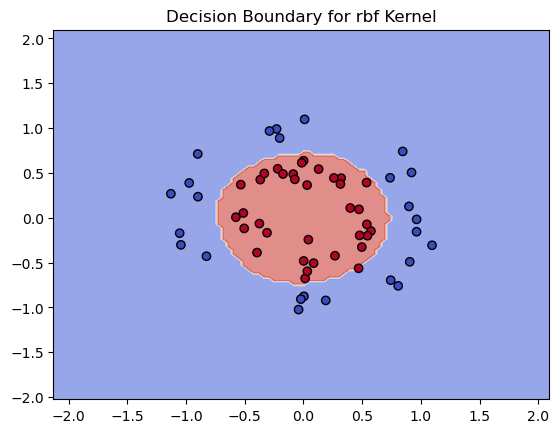

In [38]:
# use a Radial Basis Function kernel
svm2 = SVC(kernel='rbf')      
svm2.fit(X_train, y_train)
rbf_pred = svm2.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)

print(f"RBF SVM Classification Accuracy {rbf_accuracy}")
plot_decision_boundary(svm2, X_test, y_test, "rbf")

### Which kernel is a better approximator for this data, and why? Hint: Discuss the shape of the data.

The radial kernal is is a better approximator for this data because the data is clustered in a circle. For this data, the radial kernal is a better fit.  

# Problem 4: Selection Bias in Cross Validation (2 points)

We use a decision tree to classify try to predict whether a phone both has talk time >= 20 and does not have 3G. We will cover decision trees in more detail in the next lecture. For now, all you need to know is that a decision tree is a type of machine learning model. Based on the accuracy of the model, answer the questions below.

In [39]:
cellphone_df = pd.read_csv("phone.csv")
features = cellphone_df[['battery_power']]
goal = (cellphone_df["talk_time"] >= 20) & (cellphone_df["three_g"] == False)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from contextlib import suppress

accuracies, positive_predictive_values, negative_predictive_values = [],[],[]
n_folds = 10
kf = KFold(n_folds)
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = goal[train_index], goal[test_index]
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)

    #true negative, false positive, false negative, true positive
    tn, fp, fn, tp = confusion_matrix(y_test, pred, labels=[False,True]).ravel()

    accuracies.append((tn + tp) / len(y_test))
    if tp + fn > 0:
        positive_predictive_values.append(tp / (tp + fn))
    if tn + fp > 0:
        negative_predictive_values.append(tn / (tn + fp))

cv_accuracy = np.mean(accuracies)

print("Accuracy:", cv_accuracy)

Accuracy: 0.9765


That's an amazing accuracy! Now, let's look closer at our accuracy breakdown.

We'll look at the **positive predictive value** and the **negative predictive value**. The positive predictive value is the accuracy score if we only look at samples with a true label of "True", and the negative predictive value is the accuracy score if we only look at samples with a true label of "False".

So, the question _"Out of the phones that have a talk time >= 20 but don't have 3G, what percent do we predict correctly?"_ corresponds to the positive predictive value.

In [42]:
cv_positive_predictive_value = np.mean(positive_predictive_values)
cv_negative_predictive_value = np.mean(negative_predictive_values)

print("accuracy for positive samples",  cv_positive_predictive_value)
print("accuracy for negative samples", cv_negative_predictive_value)

accuracy for positive samples 0.0
accuracy for negative samples 0.9898311501391218


### Uh oh. We have a positive predictive value of 0%. How could this be, when our accuracy score is so high?

#### _Hint 1_: We use just `battery_power` to predict, and get a 98% accuracy. That seems wrong. How did our model have such a high accuracy? What contributed to that accuracy?

##### _Hint 2_: How do our predictions look? How does the goal look?

The positive predictive value is 0% because the model is failing to correctly identify any of the positive datapoints in the dataset. This issue might be due to overfitting. Because the accuracy for negative samples is very close to 1, the model is incredibly biased to predicting the "goal" (negative class). This might be because there are more negative samples than positive ones.

# Problem 5: A Common Mistake (1 pt)

The following piece of code contains a (fatal) issue. Find it! (No need to correct the error -- just state what it is.)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import root_mean_squared_error

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

error = root_mean_squared_error(y_pred, y_test)

print("Error:", error)

Error: 0.2961744388795462


### What's wrong?

##### _Hint: Think about what error is appropriate to use in regression vs. classification problems._


The issue with the code for the nearest neighbors classifier is that the n_neighbors value is not defined. Also, the root_mean_squared_error function is not written correctly.